In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
df = pd.read_csv("loan_approval_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [275]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [276]:
X = df.iloc[:,:-1]
y = df.iloc[-1]

In [277]:
X.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private


# Handling data

In [278]:
catergorial_colums = df.select_dtypes(include =["object"]).columns
numerical_colums = df.select_dtypes(include =["float64"]).columns
print(catergorial_colums)
print()
print(numerical_colums)

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')


In [279]:
# imputer to fill missing values
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[numerical_colums] = num_imp.fit_transform(df[numerical_colums])
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [280]:
cat_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[catergorial_colums] = cat_imp.fit_transform(df[catergorial_colums])
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [281]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA

Text(0.5, 1.0, 'IS LOAN APPROVEED??')

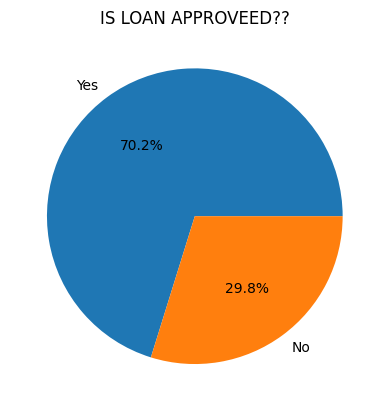

In [282]:
# are our classes balanced ?? how much?

classes_count = df["Loan_Approved"].value_counts()
plt.pie(classes_count,labels=["Yes","No"],autopct="%1.1f%%")
plt.title("IS LOAN APPROVEED??")

[Text(0, 0, '621'), Text(0, 0, '379')]

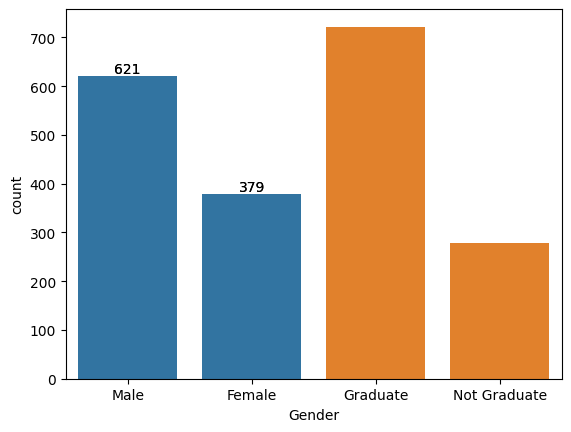

In [283]:
# analyse categories

gender_cnt = df["Gender"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])


edu_cnt = df["Education_Level"].value_counts()
ex = sns.barplot(edu_cnt)
ex.bar_label(ax.containers[0])


<Axes: xlabel='Applicant_Income', ylabel='Count'>

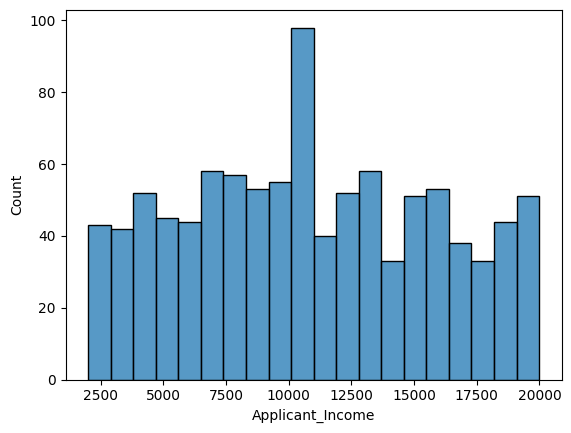

In [284]:
# analyze income

sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins=20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

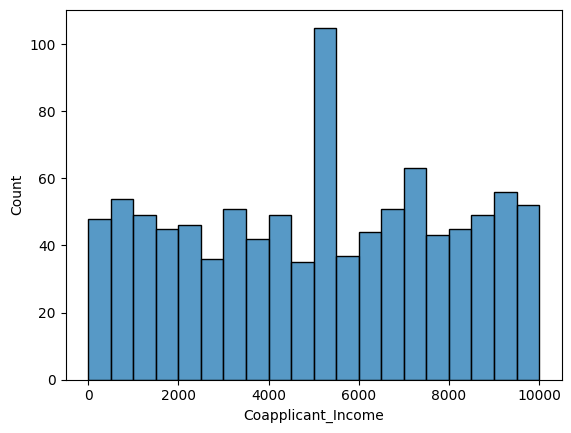

In [285]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins=20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

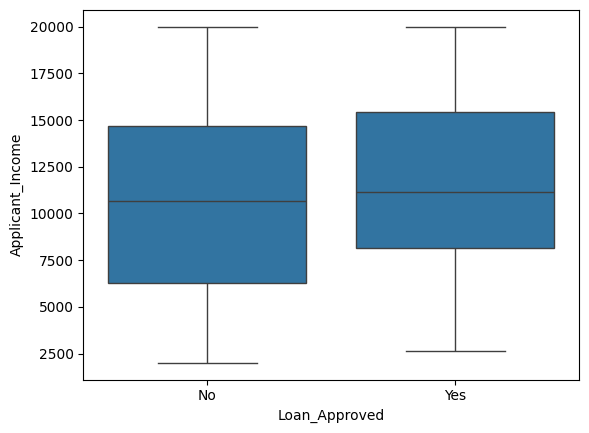

In [286]:
# outliers - box plots

sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
)

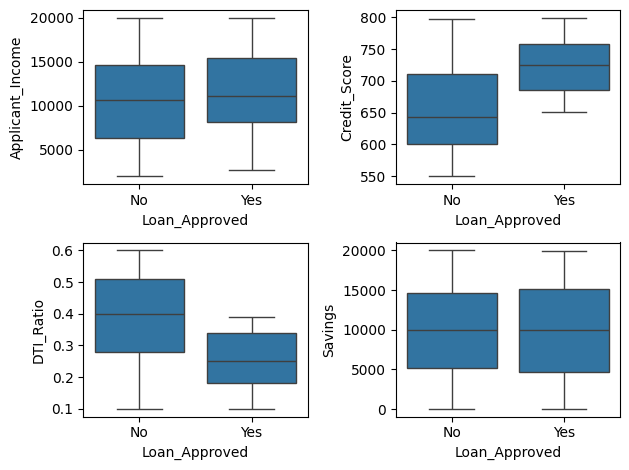

In [287]:
fig, axes = plt.subplots(2, 2)

sns.boxplot(ax=axes[0, 0], data=df, x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[0, 1], data=df, x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[1, 0], data=df, x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1, 1], data=df, x="Loan_Approved",y="Savings")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

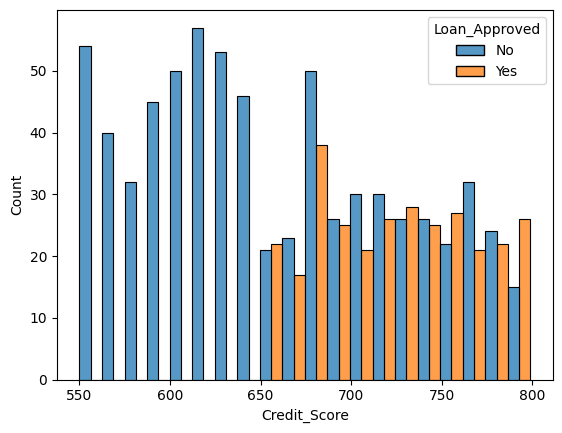

In [288]:
# Credit Score with Loan Approved

sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

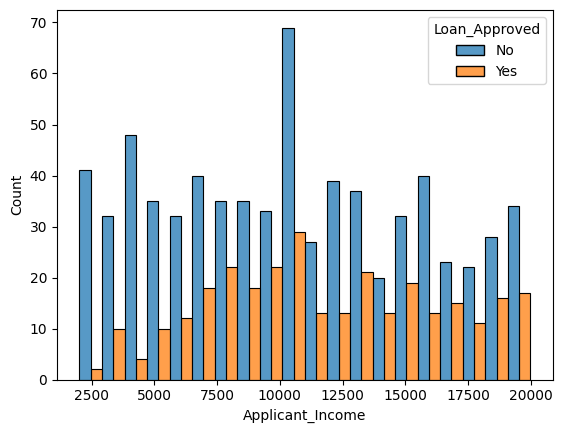

In [289]:
sns.histplot(
    data=df,
    x="Applicant_Income",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

In [290]:
# Remove Applicant Id
df = df.drop("Applicant_ID", axis=1)

# Encoding

In [291]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
df["Education_Level"]  = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [292]:
cols = ["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]
ohe = OneHotEncoder(drop="first",sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols),index = df.index)

In [293]:
df = pd.concat([df.drop(columns = cols), encoded_df],axis = 1)
df.head()


,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


# correlation heatmap

In [294]:
nums_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

<Axes: >

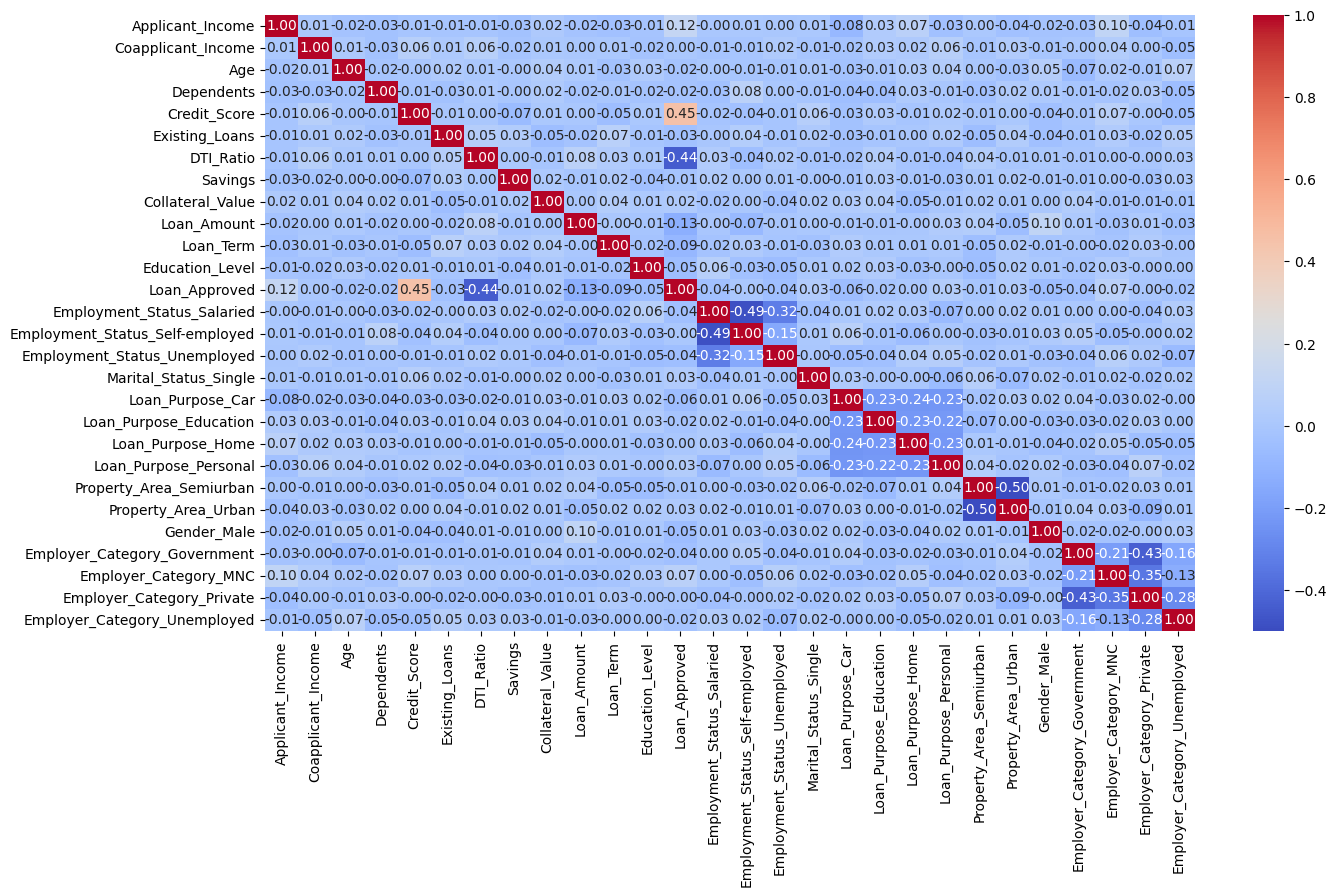

In [295]:
nums_cols = df.select_dtypes(include="number")
corr_matrix = nums_cols.corr()
plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt = ".2f",
    cmap="coolwarm"
)

# Train Test SPlit

In [296]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["Loan_Approved"])
y = df["Loan_Approved"]

In [297]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [298]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [299]:
X_test_scaled 
X_train_scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
         2.41611400e+00, -8.59726954e-01, -3.07231582e-01]],
      shape=(800, 27))

# train and evaluvate model 

In [309]:
#  Logistic Model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
# evaluvation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score, classification_report

print("logistic_regression")
print("-------------------------------------------------------")
print("Precision Score:", precision_score(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("CM:", confusion_matrix(y_test,y_pred))


logistic_regression
-------------------------------------------------------
Precision Score: 0.8518518518518519
Accuracy Score: 0.885
Recall Score: 0.7540983606557377
F1 Score: 0.8
CM: [[131   8]
 [ 15  46]]


In [310]:
#  KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=13  )
knn_model.fit(X_train_scaled,y_train)
y_pred = knn_model.predict(X_test_scaled)
# evaluvation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score, classification_report

print("knn_regression")
print("-------------------------------------------------------")
print("Precision Score:", precision_score(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("CM:", confusion_matrix(y_test,y_pred))

knn_regression
-------------------------------------------------------
Precision Score: 0.6842105263157895
Accuracy Score: 0.765
Recall Score: 0.4262295081967213
F1 Score: 0.5252525252525253
CM: [[127  12]
 [ 35  26]]


## knn is worst then logistic

In [311]:
#  Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled,y_train)
y_pred = nb_model.predict(X_test_scaled)
# evaluvation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Naive_Bayes_regression")
print("-------------------------------------------------------")
print("Precision Score:", precision_score(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("CM:", confusion_matrix(y_test,y_pred))

Naive_Bayes_regression
-------------------------------------------------------
Precision Score: 0.7777777777777778
Accuracy Score: 0.845
Recall Score: 0.6885245901639344
F1 Score: 0.7304347826086957
CM: [[127  12]
 [ 19  42]]


## Right now best model for precicion score & recall score=> Logistic Model

# feature engineering

In [312]:
# Transform freatures respecively
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = df["Loan_Approved"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [313]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187


In [314]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1 score:  0.7967479674796748
Accuracy:  0.875
CM:  [[126  13]
 [ 12  49]]


In [315]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.62
Recall:  0.5081967213114754
F1 score:  0.5585585585585585
Accuracy:  0.755
CM:  [[120  19]
 [ 30  31]]


In [316]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]


# even now the logistical model rules with precision score=> around ~80 and recall score=> ~80+